In [2]:
from traceback import format_exc

import numpy as np
import pandas as pd
from matplotlib.lines import lineStyles
from scipy.stats import alpha
from setuptools.command.rotate import rotate
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

ModuleNotFoundError: No module named 'numpy'

Przygorowanie Danych

In [ ]:
data = pd.read_csv('heart_disease_uci.csv', sep=',')
data = data.drop(columns='id')
y = data['num']
X = data.drop(columns='num')

transformer = ColumnTransformer(transformers=[('encoder', OrdinalEncoder(),
                                               ('sex', 'dataset', 'cp', 'restecg', 'slope', 'thal'))]
                                , remainder="passthrough")
X_enc = transformer.fit_transform(X)

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imp = imp.fit_transform(X_enc)

In [ ]:
n = [50, 75, 100, 125, 150, 200, 250, 300, 350]
results = {}
for i in n:
    forest = RandomForestClassifier(n_estimators=i, random_state=0)
    result = cross_val_score(forest, X_imp, y, cv=10).mean()
    results[i] = result
print(results)

{50: np.float64(0.5010869565217392), 75: np.float64(0.49347826086956526), 100: np.float64(0.4967391304347826), 125: np.float64(0.5065217391304347), 150: np.float64(0.4967391304347826), 200: np.float64(0.5119565217391304), 250: np.float64(0.5076086956521739), 300: np.float64(0.5054347826086956), 350: np.float64(0.5065217391304347)}


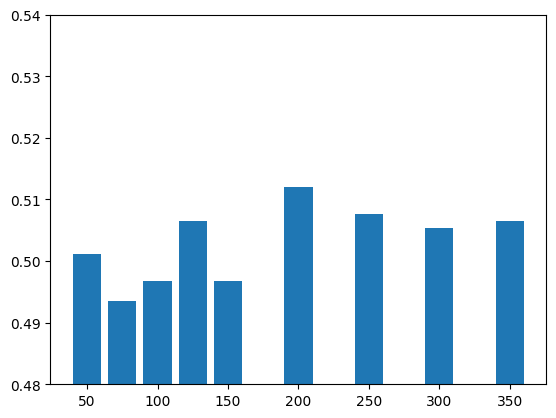

In [ ]:
fig, ax = plt.subplots()
ax.bar(results.keys(), results.values(), width=20)
ax.set(ylim=(0.48 , 0.54))
plt.show()

PCA

In [ ]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_imp)

Modele

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=0),
    "PCA + Random Forest": RandomForestClassifier(n_estimators=200, random_state=0),
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "PCA + Decision Tree": DecisionTreeClassifier(random_state=0),
    "KNN": KNeighborsClassifier(n_neighbors=20),
    "PCA + KNN":KNeighborsClassifier(n_neighbors=20)
}
results = {}
results["Random Forest"] = cross_val_score(models["Random Forest"], X_imp, y, cv=10).mean()
results["PCA + Random Forest"] = cross_val_score(models["PCA + Random Forest"], X_pca, y, cv=10).mean()

results["Decision Tree"] = cross_val_score(models["Decision Tree"], X_imp, y, cv=10).mean()
results["PCA + Decision Tree"]= cross_val_score(models["PCA + Decision Tree"], X_pca, y, cv=10).mean()

results["KNN"] = cross_val_score(models["KNN"], X_imp, y, cv=10).mean()
results["PCA + KNN"] = cross_val_score(models["PCA + KNN"], X_pca, y, cv=10).mean()

Wyniki

In [ ]:
print("Wyniki modeli (accuracy):")
for k, v in results.items():
    print(f"{k:25s}: {v:.4f}")

Wyniki modeli (accuracy):
Random Forest            : 0.5120
PCA + Random Forest      : 0.5033
Decision Tree            : 0.4489
PCA + Decision Tree      : 0.3989
KNN                      : 0.4522
PCA + KNN                : 0.5033


Wykres porównawczy

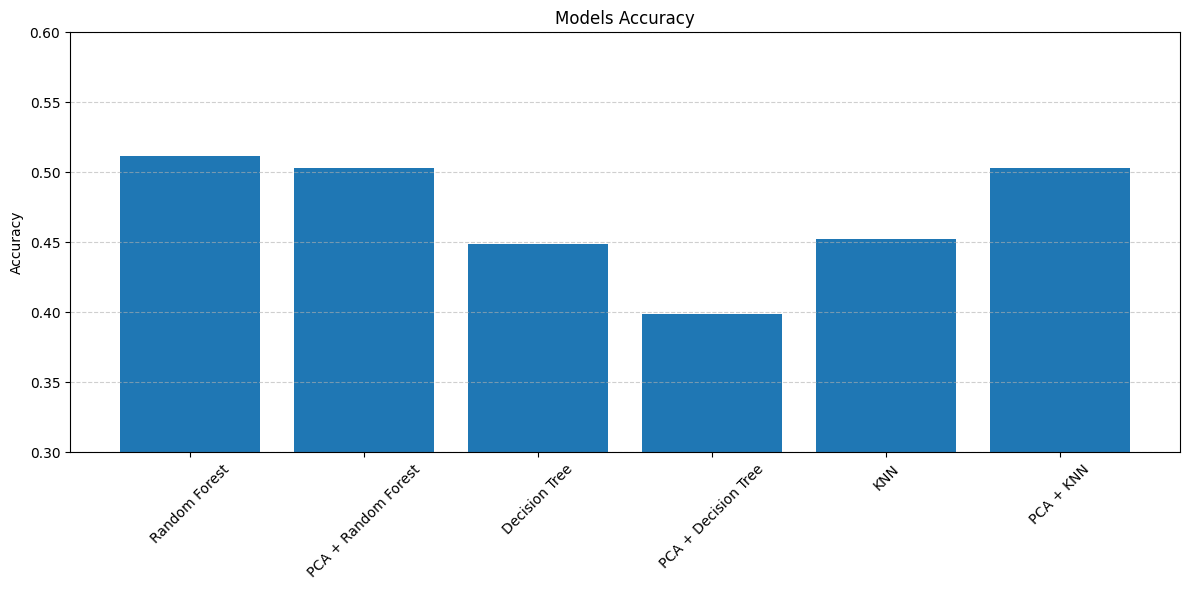

In [ ]:
names = list(results.keys())
values = list(results.values())

plt.figure(figsize=(12, 6))
plt.bar(names, values)
plt.title("Models Accuracy")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.ylim(0.3, 0.6)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()